In [20]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import os
from tensorflow import keras
import pandas as pd
from tqdm import tqdm
import glob

AUTOTUNE = tf.data.AUTOTUNE

In [2]:
model = tf.keras.models.load_model('classificatio_model.h5')

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
MobilenetV3small (Functional (None, 1, 1, 1024)        1529968   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 1,540,258
Trainable params: 1,528,126
Non-trainable params: 12,132
______________________________________________

In [9]:
RES = 32


In [11]:
# 데이터 셋 호출 
data_dir = "."
train_dir = os.path.join(data_dir, 'seg_train', 'seg_train')
val_dir = os.path.join(data_dir, 'seg_test', 'seg_test')

train_ds = keras.preprocessing.image_dataset_from_directory(
    train_dir,
    shuffle=False,
    image_size=(RES, RES),
    # batch_size=N_BATCH
)
val_ds = keras.preprocessing.image_dataset_from_directory(
    val_dir,
    shuffle=False,
    image_size=(RES, RES),
    # batch_size=N_BATCH
)

train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


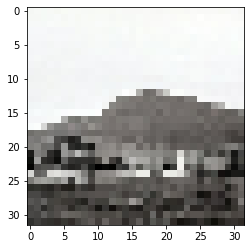

In [18]:
# train_ds.shape
for image, label in train_ds.take(1):
    pass

plt.imshow(image[0].numpy().astype('uint8'))
# image[0].shape

In [22]:
folder_list = os.listdir('seg_train/seg_train')
folder_list

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [24]:
image_list = glob.glob(folder_list, '*.png')

NameError: name 'glob' is not defined

In [ ]:
map = pd.DataFrame(columns=['image_idx', 'label', '0', '1', '2', '3', '4', '5', '6' , '7', '8', '9'])
idx = 0
for images, labels in tqdm(train_ds):
#   for b in range(N_BATCH): 
    image = images[1]
    print(image.shape)
    pred = model.predict(image[tf.newaxis, ...])
      # pred_
    map = map.append({'image_idx' : idx, 
                    'label' : int(label.numpy()[0]), 
                    '0' : pred[0][0],
                    '1' : pred[0][1], 
                    '2' : pred[0][2], 
                    '3' : pred[0][3], 
                    '4' : pred[0][4], 
                    '5' : pred[0][5], 
                    '6' : pred[0][6], 
                    '7' : pred[0][7], 
                    '8' : pred[0][8], 
                    '9' : pred[0][9]}, ignore_index=True)
    idx += 1
    
print(map)
map.to_csv('map.csv')